In [46]:
import pandas as pd
import numpy as np
from natsort import natsorted
import os

def read_and_concatenate_data(folder_path):
    result = pd.DataFrame()

    for dirpath, dirnames, filenames in os.walk(folder_path):
        filenames = natsorted(filenames)
        for filename in filenames:
            file_path = os.path.join(dirpath, filename)
            # Check if the item is a file and ends with '.txt'
            if os.path.isfile(file_path) and filename.endswith('.txt'):
                # Read the text file into a DataFrame
                df = pd.read_csv(file_path, sep=';', header=None)
                # Concatenate the current DataFrame with the result
                result = pd.concat([result, df], axis=1, ignore_index=True)

    return result

base_path = 'final_Results/results_TC1800_AW'
aw_values = range(25, 151, 25)
datasets = {}

for aw in aw_values:
    dtag_folder_path = f'{base_path}{aw}/dtag_script_results/'
    dtap_folder_path = f'{base_path}{aw}/dtap_script_results/'
    cbls_folder_path = f'{base_path}{aw}/cbls_script_results/'
    cbls_m_folder_path = f'{base_path}{aw}/cbls_m_script_results/'
    sebs_folder_path = f'{base_path}{aw}/sebs_script_results/'

    dtag = read_and_concatenate_data(dtag_folder_path)
    dtap = read_and_concatenate_data(dtap_folder_path)
    cbls = read_and_concatenate_data(cbls_folder_path)
    cbls_m = read_and_concatenate_data(cbls_m_folder_path)
    sebs = read_and_concatenate_data(sebs_folder_path)

    result_concatenated = pd.concat([dtag, dtap, cbls, cbls_m, sebs], axis=0)
    dataset = result_concatenated.to_numpy()
    dataset = np.reshape(dataset, (5, 3, -1, 20))

    # Store the dataset in the dictionary with the AW value as the key
    datasets[aw] = dataset



legend_fontsize = 14
axis_fontsize = 16
tick_fontsize = 12



In [47]:
# dataset = datasets[25]
successful_counts_dict = {}
total_counts_dict = {}
all_successful_counts = np.zeros((5,4,6,3))
all_total_counts = np.zeros((5,4,6))
AW_average = np.zeros((5,6))
AW_diff_maps = np.zeros((5,4,6))
AW_counts = np.zeros((5,4,6))

AW_agents = np.zeros((5,4,6,6))
AW_agents_counts = np.zeros((5,4,6,6))


for k, aw in enumerate(aw_values):

    dataset = datasets[aw]  
    successful_counts = np.zeros((5,4,6,3))
    total_counts = np.zeros((5,4,6))

    for algo in range(5):
        for j, data in enumerate(dataset[algo,2,:,:]):
            for i in range(len(data)):
                if data[i] == 1:

                    AW_diff_maps[algo, j//18, k] += 1
                    AW_counts[algo, j//18, k] += 1

                    AW_agents[algo, j//18, j%18//3, k] += 1
                    AW_agents_counts[algo, j//18, j%18//3, k] += 1

                    all_successful_counts[algo,j//18,j%18//3,0] += 1
                    successful_counts[algo,j//18,j%18//3,0] += 1
                    total_counts[algo,j//18,j%18//3] += 1
                    all_total_counts[algo,j//18,j%18//3] += 1

                elif (data[i] == 0):

                    AW_counts[algo, j//18, k] += 1

                    AW_agents_counts[algo, j//18, j%18//3, k] += 1

                    all_successful_counts[algo,j//18,j%18//3,1] += 1
                    successful_counts[algo,j//18,j%18//3,1] += 1
                    total_counts[algo,j//18,j%18//3] += 1
                    all_total_counts[algo,j//18,j%18//3] += 1

                elif (data[i] == -1):

                    AW_counts[algo, j//18, k] += 1
                    
                    AW_agents_counts[algo, j//18, j%18//3, k] += 1

                    all_successful_counts[algo,j//18,j%18//3,2] += 1
                    successful_counts[algo,j//18,j%18//3,2] += 1
                    total_counts[algo,j//18,j%18//3] += 1
                    all_total_counts[algo,j//18,j%18//3] += 1

            # print(sum(sum(successful_counts[algo, :, :, 0])))
            # print(sum(sum(total_counts[algo, :, :])))

        AW_average[algo, k] = sum(sum(successful_counts[algo, :, :, 0])) / sum(sum(total_counts[algo, :, :]))
    successful_counts_dict[aw] = successful_counts
    total_counts_dict[aw] = total_counts



In [48]:
dataset = datasets[125]
dataset.shape

successful_counts = np.zeros((5,4))

for algo in range(5):
    for j, data in enumerate(dataset[algo,2,:,:]):
        # if (algo == 3)&(j//18 == 3):
        #     print(data)
        for i in range(len(data)):
            if data[i] == 1:
                successful_counts[algo,j//18] += 1
            elif (data[i] == 0):
                successful_counts[algo,j//18] += 1
            elif (data[i] == -1):
                successful_counts[algo,j//18] += 1

In [49]:
# df = pd.DataFrame()

# for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):
#    df = pd.concat(sum(all_successful_counts[j,:,:,0]) / sum(all_total_counts[j, :, :]))

# df
names =  [1,2,4,6,8,12]
maps = ['Diag', 'Cumberland', 'Example', 'Grid']


# Initialize an empty DataFrame
df = pd.DataFrame()
df['Agent count'] = [i for i in names]
df.set_index(['Agent count'])

# Iterate over the algorithms
for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):


    success_probability = sum(all_successful_counts[j,:,:,0]) / sum(all_total_counts[j, :, :])

    df[algo] = [i for i in success_probability]

# Display the DataFrame
print(df)
for i, map in enumerate(maps):

    names =  [1,2,4,6,8,12]

    # Initialize an empty DataFrame
    df = pd.DataFrame()
    df['Agent count'] = [i for i in names]
    df.set_index(['Agent count'])

    # Iterate over the algorithms
    for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):


        success_probability = all_successful_counts[j,i,:,0] / all_total_counts[j, i, :]


        df[algo] = [l for l in success_probability]

    # Display the DataFrame
    print(map)
    print(df)

   Agent count      DTAG      DTAP      CBLS    CBLS_M      SEBS
0            1  0.921528  0.950694  0.746528  0.780556  0.880556
1            2  0.809722  0.877778  0.723611  0.707639  0.718750
2            4  0.634028  0.650694  0.628472  0.527778  0.537500
3            6  0.513194  0.459028  0.523611  0.396528  0.397222
4            8  0.507857  0.428472  0.531250  0.299306  0.310563
5           12  0.399265  0.437879  0.459722  0.250694  0.211594
Diag
   Agent count      DTAG      DTAP      CBLS    CBLS_M      SEBS
0            1  0.897222  0.905556  0.780556  0.847222  0.777778
1            2  0.875000  0.972222  0.861111  0.877778  0.861111
2            4  0.688889  0.891667  0.819444  0.722222  0.680556
3            6  0.686111  0.650000  0.791667  0.605556  0.622222
4            8  0.686111  0.577778  0.855556  0.452778  0.458333
5           12  0.602778  0.625000  0.716667  0.416667  0.355556
Cumberland
   Agent count      DTAG      DTAP      CBLS    CBLS_M      SEBS
0        

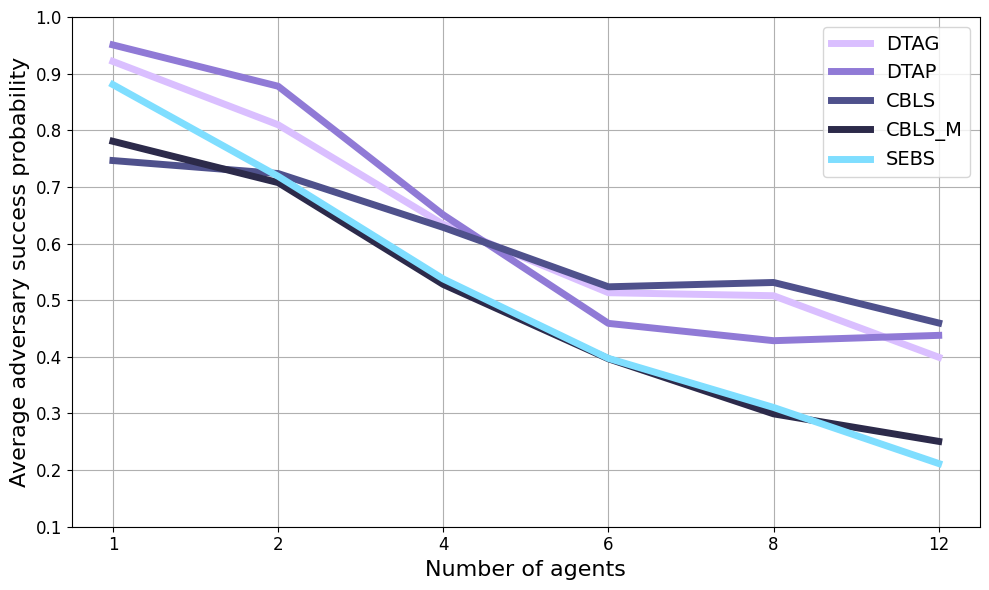

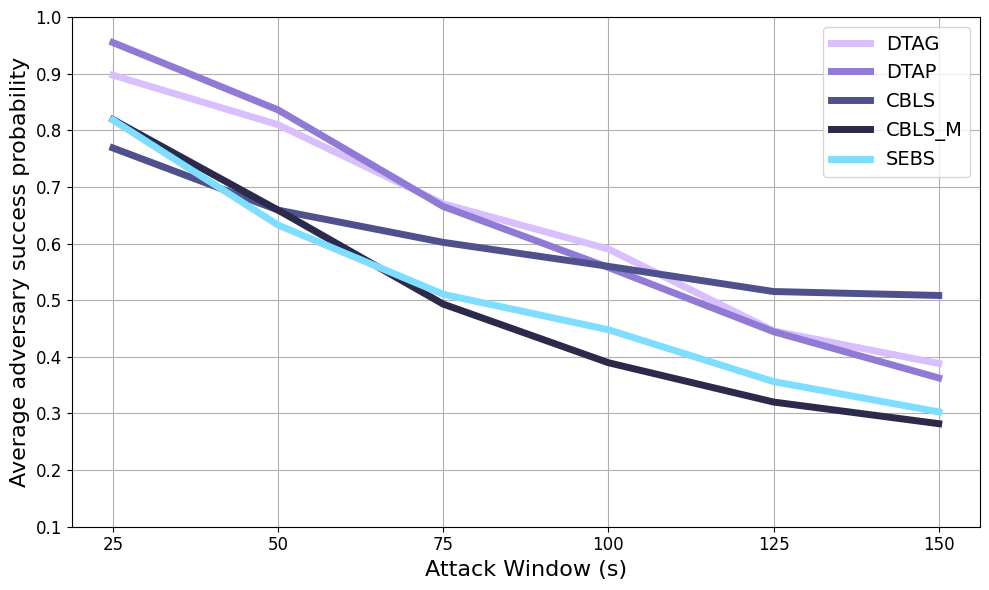

In [50]:
import matplotlib.pyplot as plt
import numpy as np

agents = np.arange(1, 7)

colours = ['#DABFFF', '#907AD6', '#4F518C', '#2C2A4A', '#7FDEFF']

# Create subplots with shared x-axis and y-axis
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharex=True, sharey=True)

for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):
    # Iterate over each subplot and plot the data

    ax.plot(agents, sum(all_successful_counts[j, :, :, 0]) / sum(all_total_counts[j, :, :]), color=colours[j], label=algo, linewidth=5)

    ax.set_xticks(agents)
    ax.set_xticklabels(['1', '2', '4', '6', '8', '12'])
    ax.legend(fontsize=legend_fontsize)
    ax.set_yticks(np.arange(0.1, 1.1, 0.1))
    ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.grid()

# Set the y-axis label for the left subplots
ax.set_ylabel('Average adversary success probability', fontsize=axis_fontsize)

# Set the x-axis label for the bottom subplots
ax.set_xlabel('Number of agents', fontsize=axis_fontsize)


plt.tight_layout()
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharex=True, sharey=True)

for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):
    # Iterate over each subplot and plot the data

    ax.plot(agents, AW_average[j,:], color=colours[j], label=algo, linewidth=5)

    ax.set_xticks(agents)
    ax.set_xticklabels(['{:.0f}'.format(x) for x in range(25,151,25)])
    ax.legend(fontsize=legend_fontsize)
    ax.set_yticks(np.arange(0.1, 1.1, 0.1))
    ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
    ax.grid()

# Set the y-axis label for the left subplots
ax.set_ylabel('Average adversary success probability', fontsize=axis_fontsize)

# Set the x-axis label for the bottom subplots
ax.set_xlabel('Attack Window (s)', fontsize=axis_fontsize)


plt.tight_layout()
plt.savefig('plots/average_success_probability_results')
plt.show()
plt.close(fig)

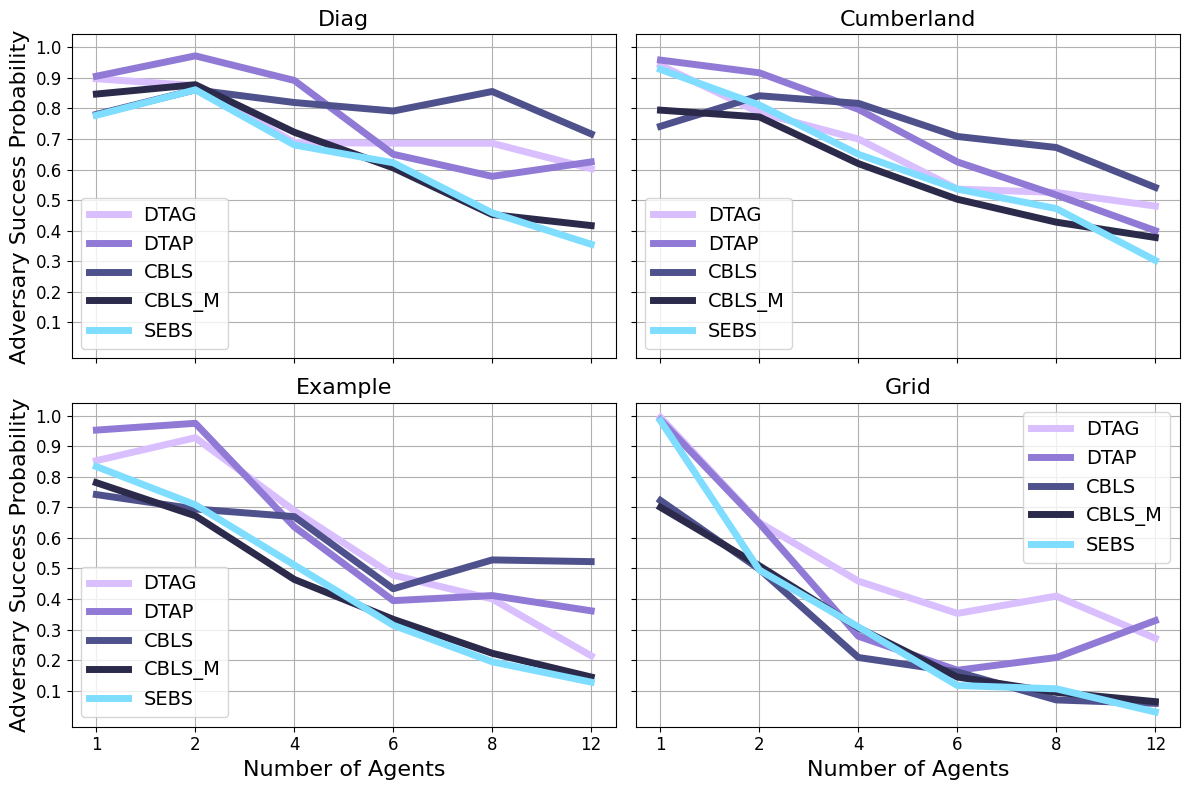

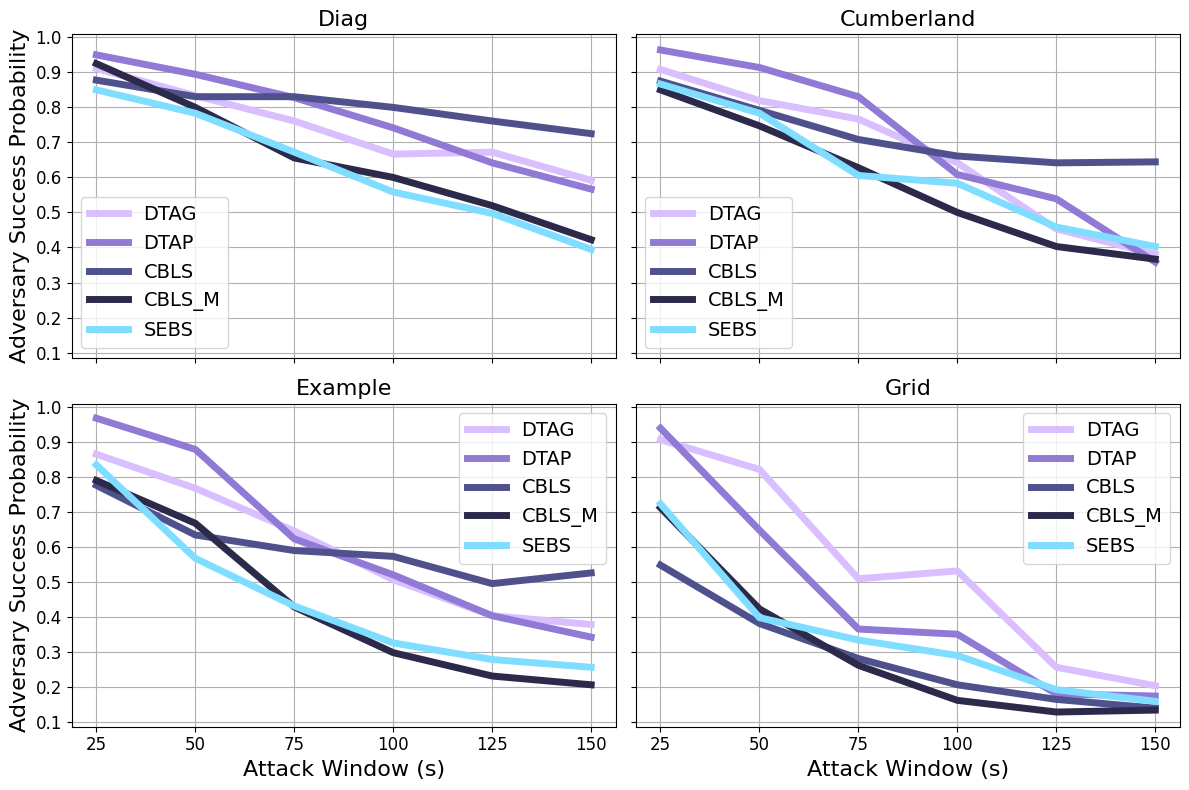

[256. 152.  94.  58.  46.  48.]
[360. 360. 360. 360. 360. 360.]


In [51]:

import matplotlib.pyplot as plt
import numpy as np

agents = np.arange(1, 7)
maps = ['Diag', 'Cumberland', 'Example', 'Grid']
colours = ['#DABFFF', '#907AD6', '#4F518C', '#2C2A4A', '#7FDEFF']

# Create subplots with shared x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True, sharey=True)

for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):
    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        ax.plot(agents, all_successful_counts[j, i, :, 0] / all_total_counts[j, i, :], color=colours[j], label=algo, linewidth=5)

        ax.set_title(map, fontsize=axis_fontsize)
        ax.set_xticks(agents)
        ax.set_xticklabels(['1', '2', '4', '6', '8', '12'])
        ax.legend(fontsize=legend_fontsize)
        ax.set_yticks(np.arange(0.1, 1.1, 0.1))
        ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

        ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
        ax.grid()

# Set the y-axis label for the left subplots
axes[0, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)
axes[1, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)

# Set the x-axis label for the bottom subplots

axes[1, 0].set_xlabel('Number of Agents', fontsize=axis_fontsize)
axes[1, 1].set_xlabel('Number of Agents', fontsize=axis_fontsize)


plt.tight_layout()
plt.show()

# Create subplots with shared x-axis and y-axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8), sharex=True, sharey=True)

for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):
    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        ax.plot(agents, AW_diff_maps[j, i, :] / AW_counts[j, i, :], color=colours[j], label=algo, linewidth=5)

        ax.set_title(map, fontsize=axis_fontsize)
        ax.set_xticks(agents)
        ax.set_xticklabels(['{:.0f}'.format(x) for x in range(25,151,25)])
        ax.legend(fontsize=legend_fontsize)
        ax.set_yticks(np.arange(0.1, 1.1, 0.1))
        ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

        ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
        ax.grid()

# Set the y-axis label for the left subplots
axes[0, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)
axes[1, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)

# Set the x-axis label for the bottom subplots

axes[1, 0].set_xlabel('Attack Window (s)', fontsize=axis_fontsize)
axes[1, 1].set_xlabel('Attack Window (s)', fontsize=axis_fontsize)

plt.tight_layout()
plt.show()
print(AW_diff_maps[3,3,:])
print(AW_counts[3,3,:])


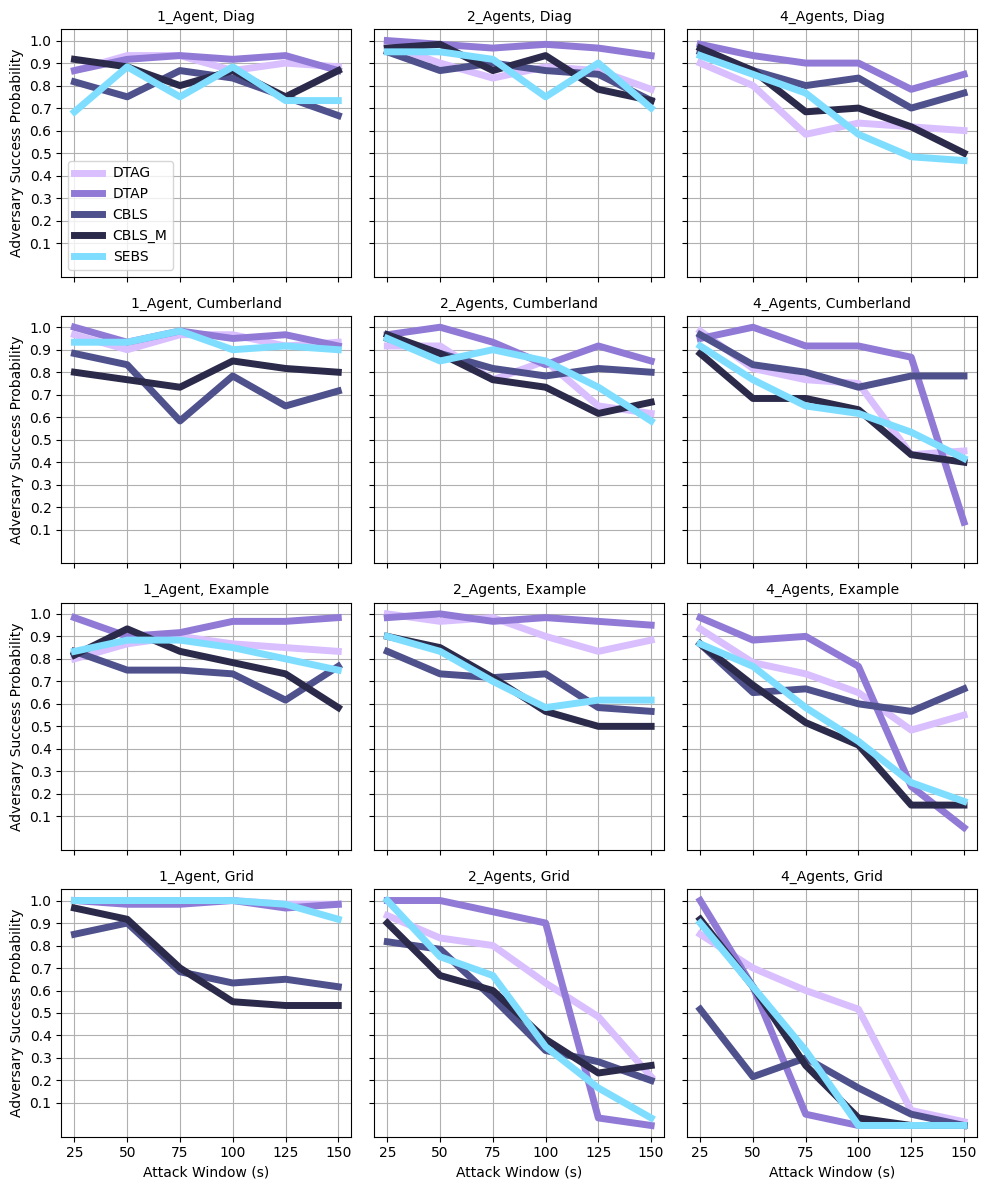

/var/folders/b5/lyr1nzqx4kq7mbz3wsnfsxcw0000gn/T/ipykernel_6585/2350049812.py:30: RuntimeWarning: invalid value encountered in divide
  ax.plot(agents, AW_agents[j, i, k%3+(l*3), :] / AW_agents_counts[j, i, k%3+(l*3),:], color=colours[j], label=algo, linewidth=5)


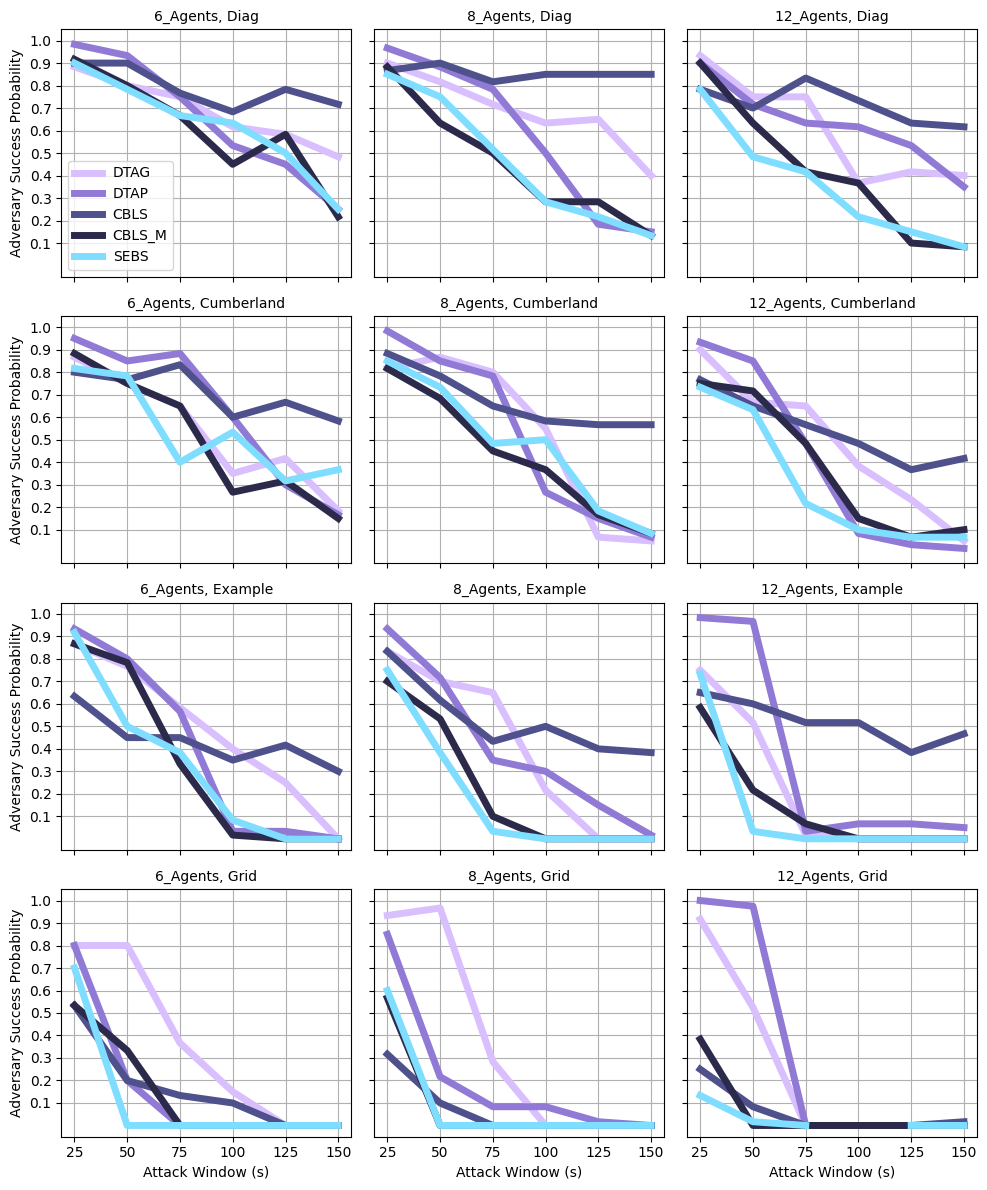

In [52]:
import matplotlib.pyplot as plt
import numpy as np

axis_fontsize = 10
tick_fontsize = 10
legend_fontsize = 10

successful_counts = successful_counts_dict[aw]
total_counts = total_counts_dict[aw]

agents = np.arange(1, 7)
maps = ['Diag', 'Cumberland', 'Example', 'Grid']
names =  ['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents']

colours = ['#DABFFF','#907AD6','#4F518C','#2C2A4A','#7FDEFF']

for l in range(2):
# Create subplots
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 12), sharex=True, sharey=True)

    for k, aw in enumerate(aw_values[l*3:l*3+3]):

        # Iterate over each subplot and plot the data
        for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):
            # Iterate over each subplot and plot the data
            for i, map in enumerate(maps):
                col, row = divmod(i, 4)
                ax = axes[row, col+k%3]

                ax.plot(agents, AW_agents[j, i, k%3+(l*3), :] / AW_agents_counts[j, i, k%3+(l*3),:], color=colours[j], label=algo, linewidth=5)

                ax.set_title(f'{names[k%3+(l*3)]}, {map}', fontsize=axis_fontsize)
                ax.set_xticks(agents)
                ax.set_xticklabels(['{:.0f}'.format(x) for x in range(25,151,25)])
                if (row==0)&(col+k%3==0):
                    ax.legend(fontsize=legend_fontsize)
                ax.set_yticks(np.arange(0.1, 1.1, 0.1))
                ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

                ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
                ax.grid()
                
                # fig.suptitle(f'{map}, {names[k]}', fontsize=axis_fontsize)



    axes[0, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)
    axes[1, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)
    axes[2, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)
    axes[3, 0].set_ylabel('Adversary Success Probability', fontsize=axis_fontsize)

    # Set the x-axis label for the bottom subplots

    axes[3, 0].set_xlabel('Attack Window (s)', fontsize=axis_fontsize)
    axes[3, 1].set_xlabel('Attack Window (s)', fontsize=axis_fontsize)
    axes[3, 2].set_xlabel('Attack Window (s)', fontsize=axis_fontsize)

    plt.grid
    plt.tight_layout()  
    plt.show()





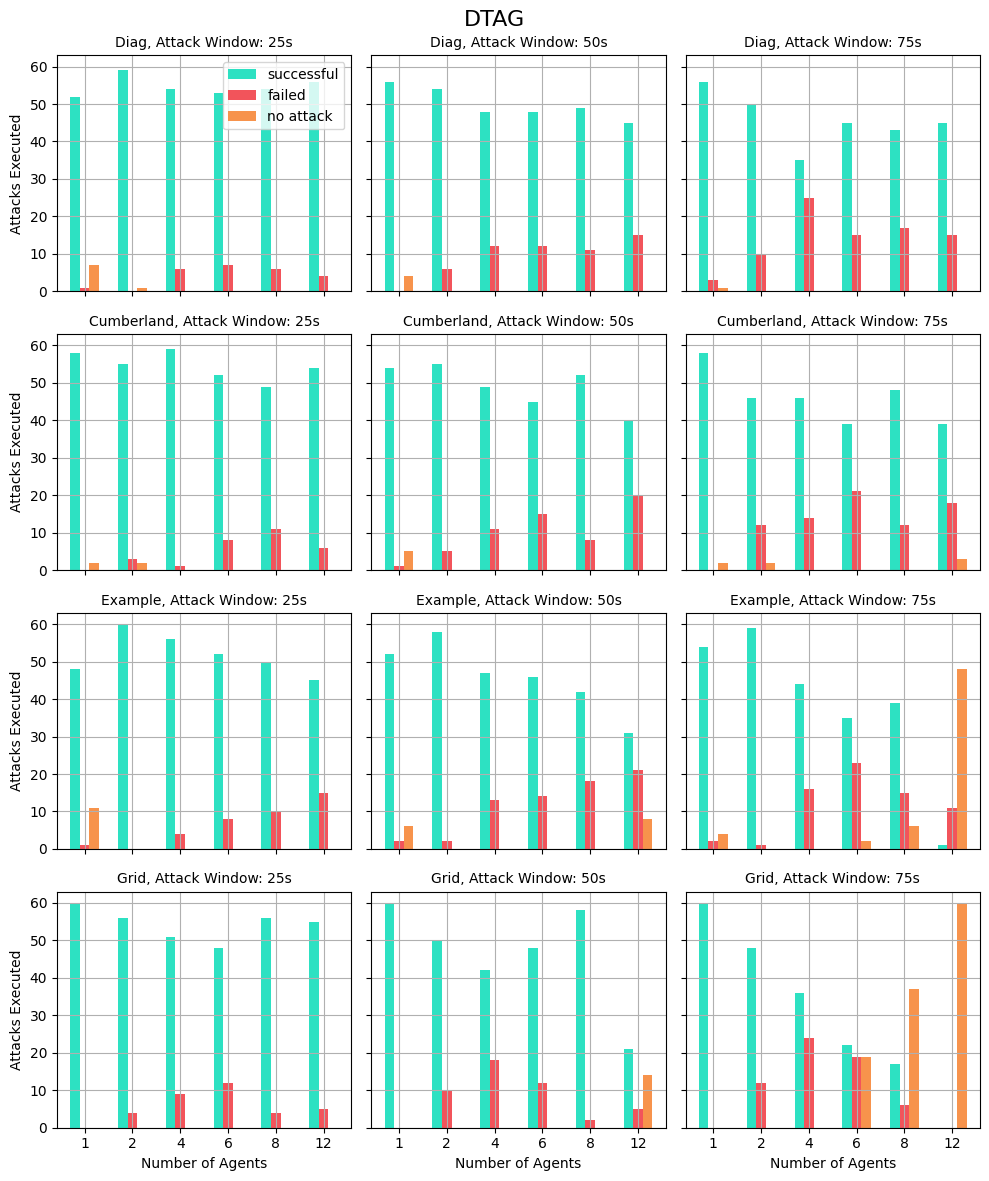

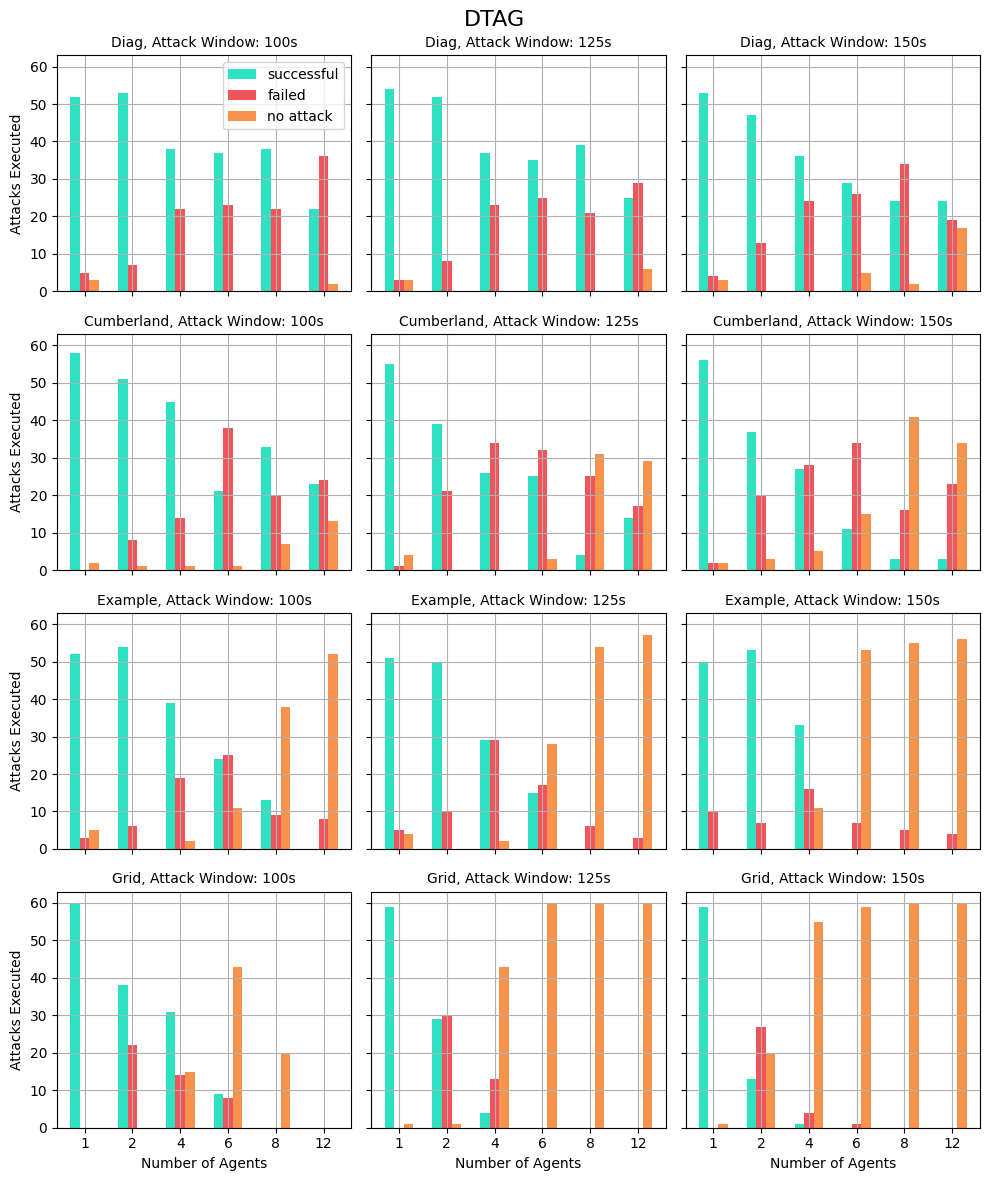

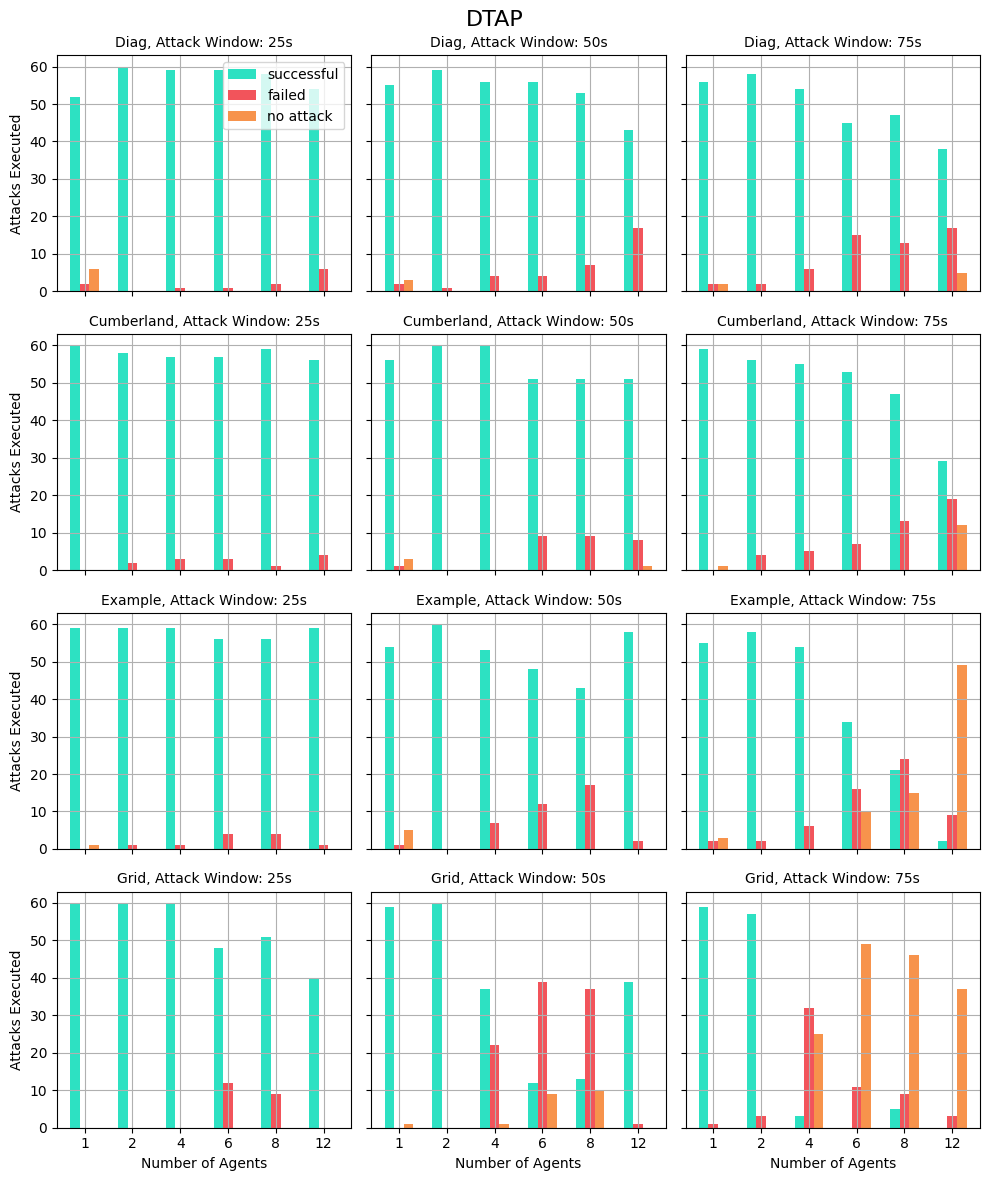

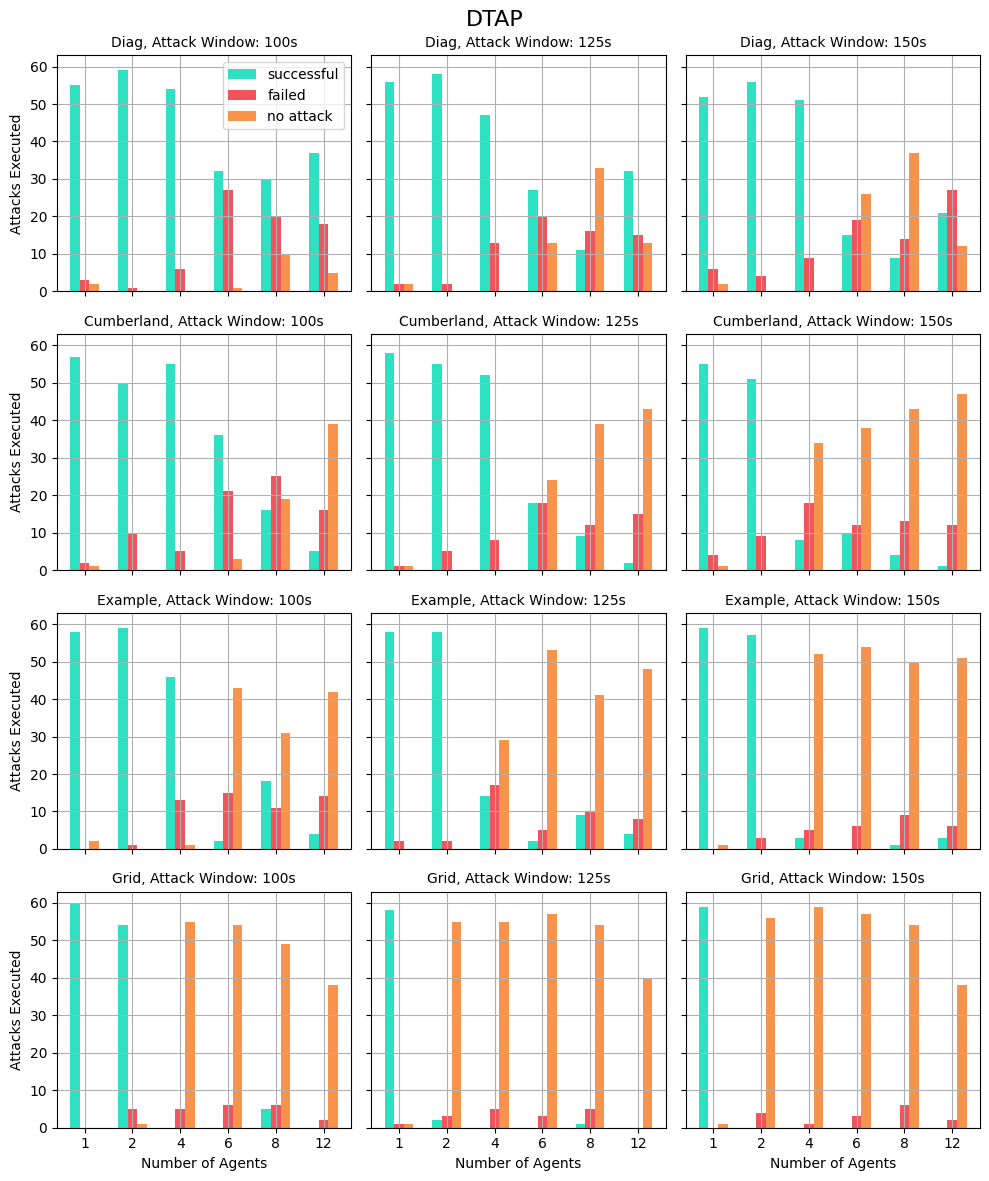

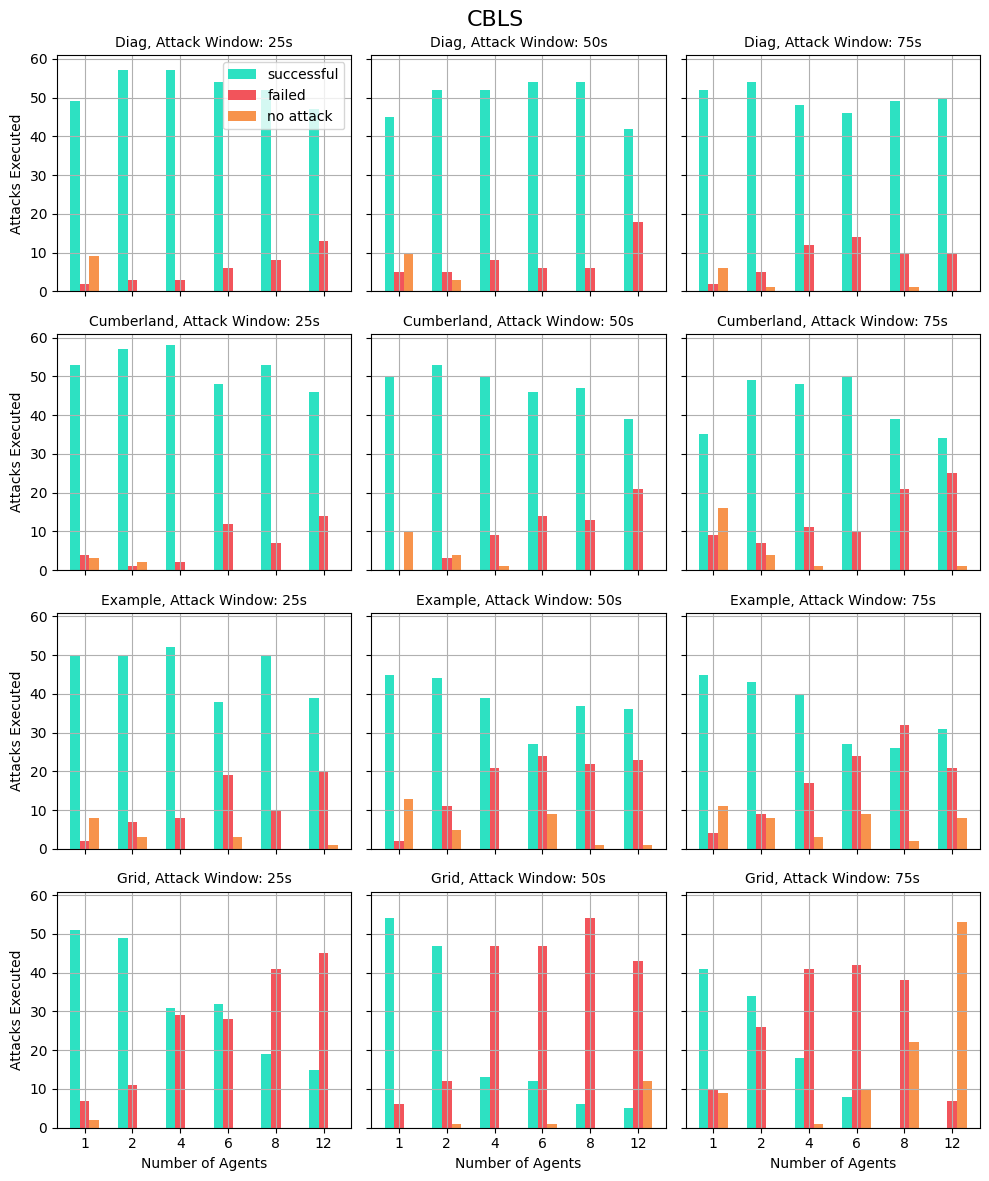

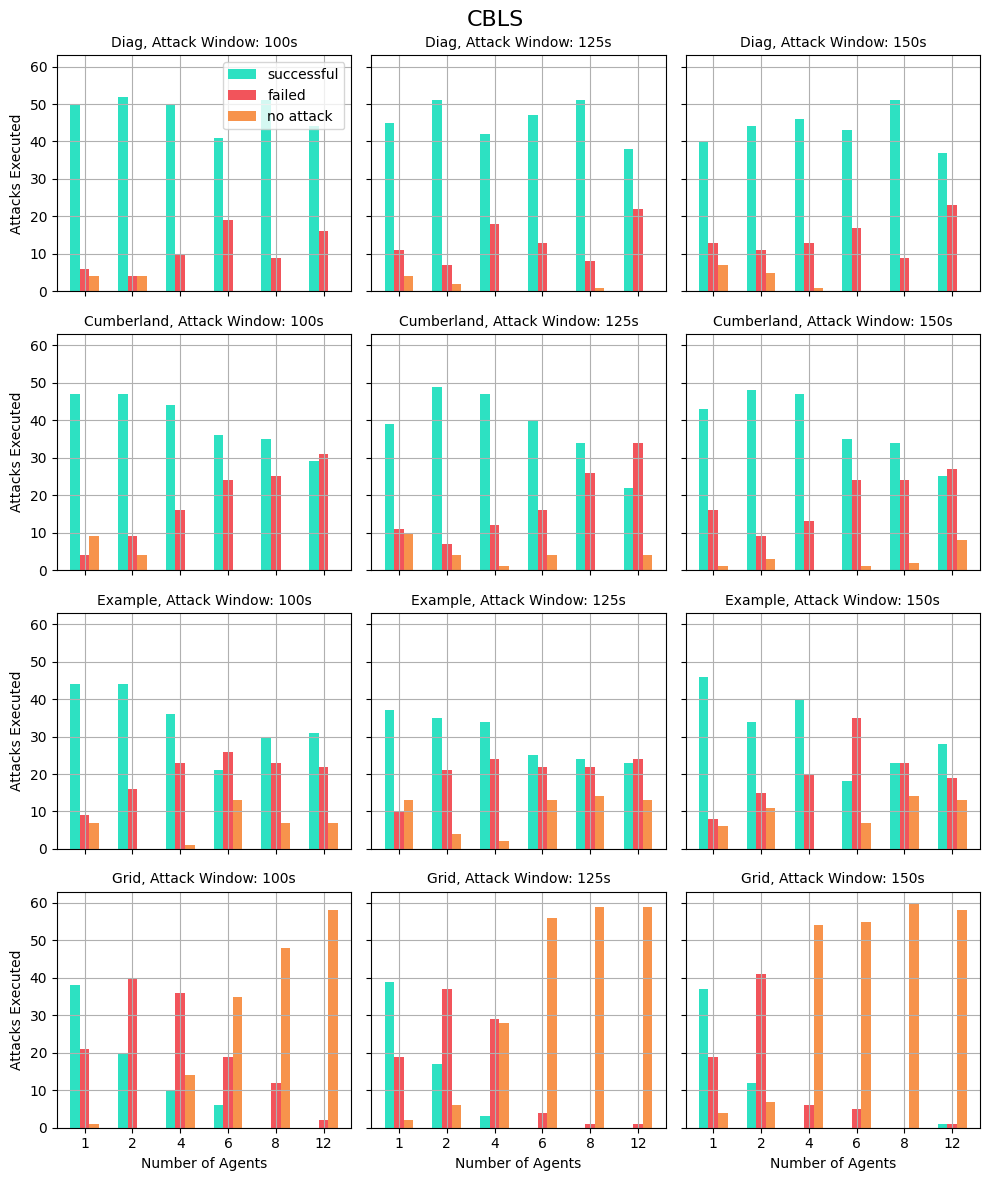

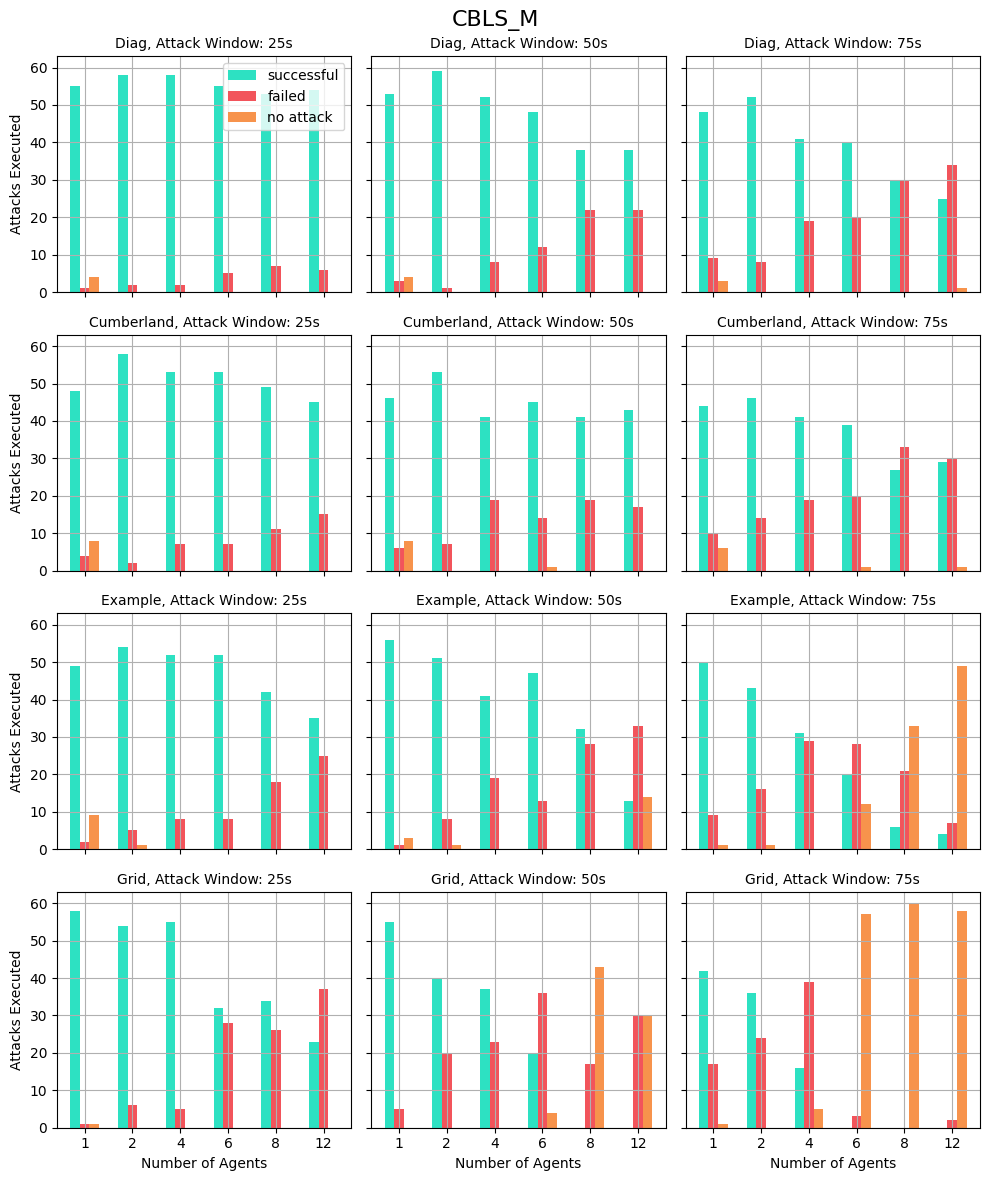

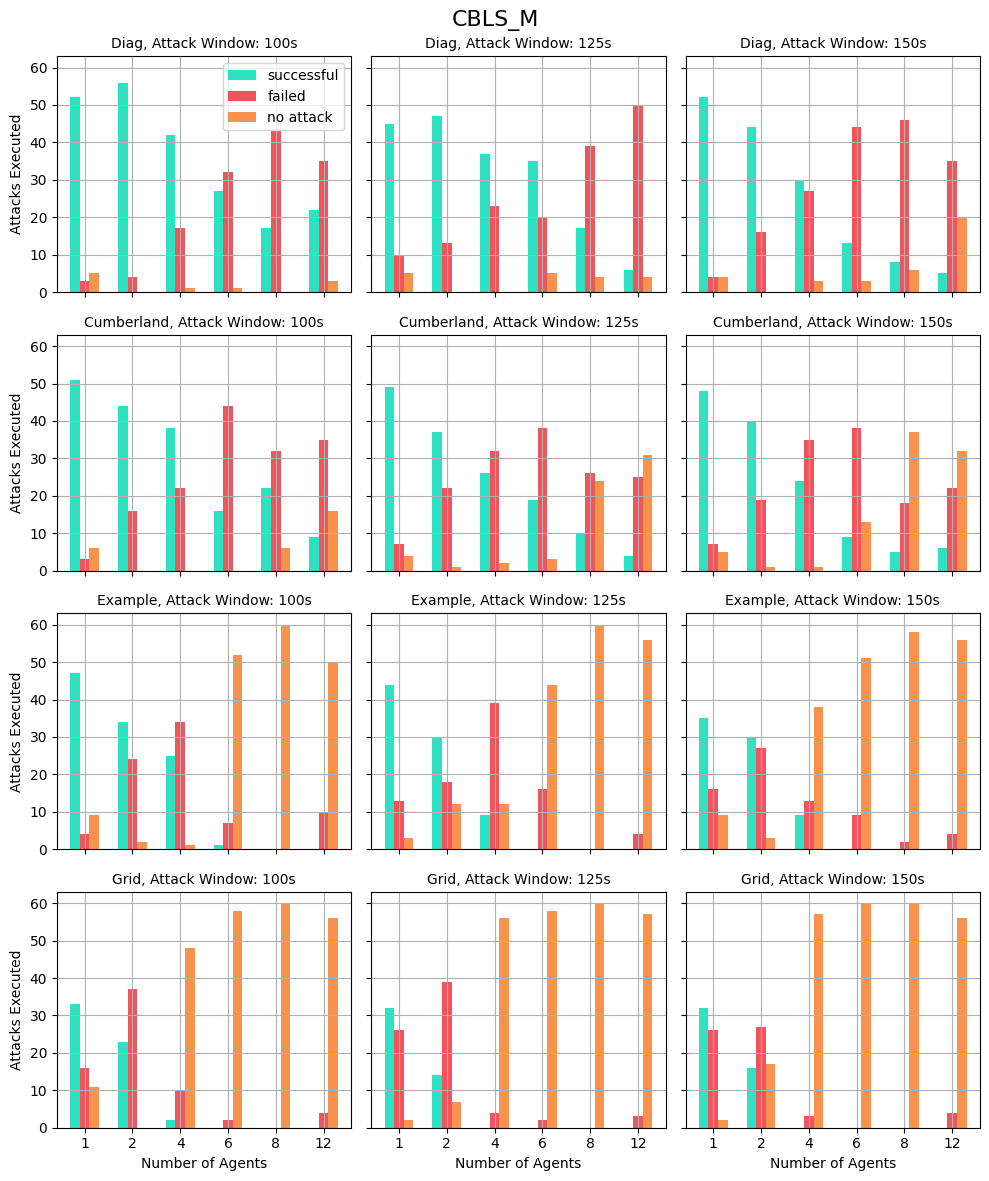

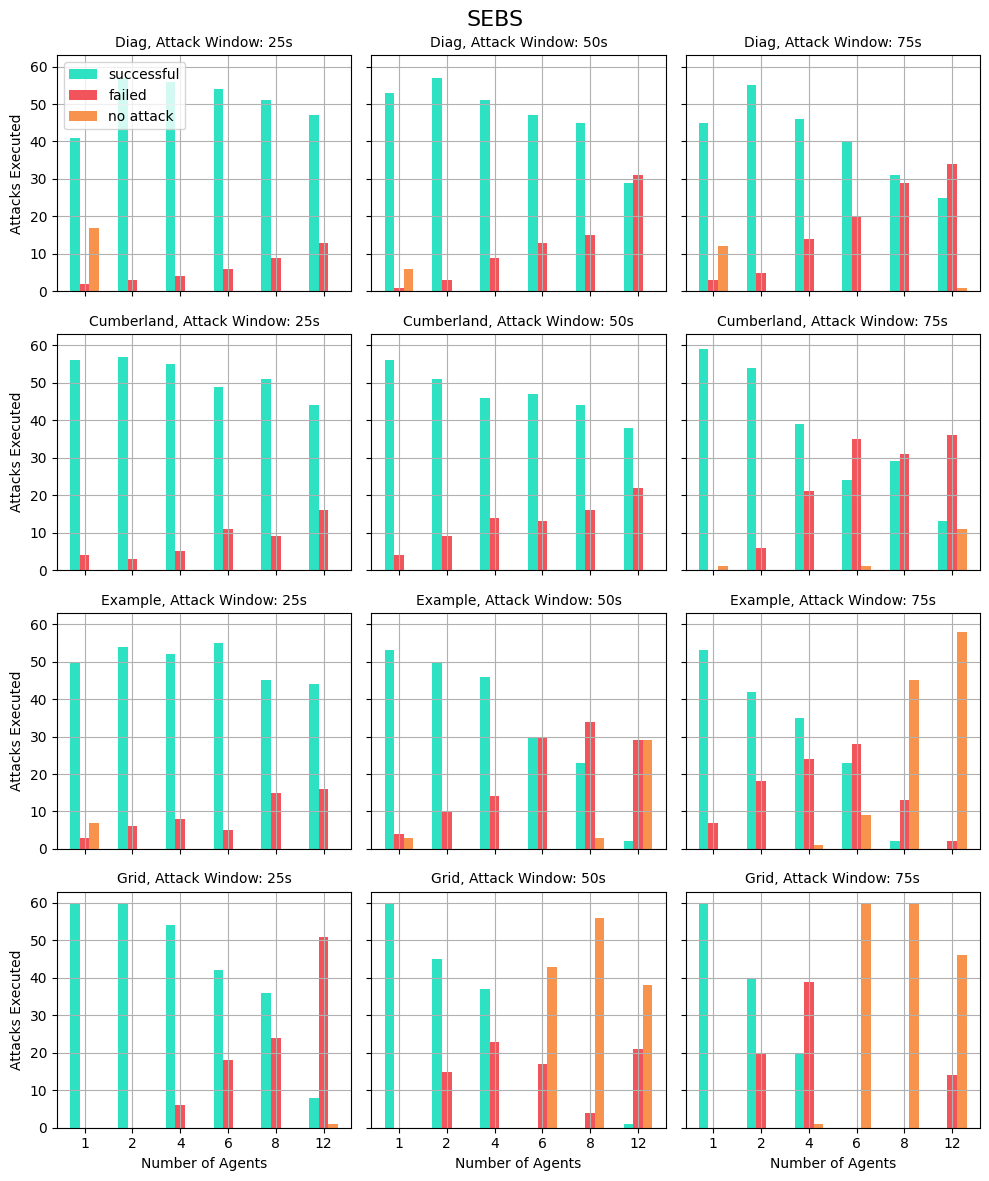

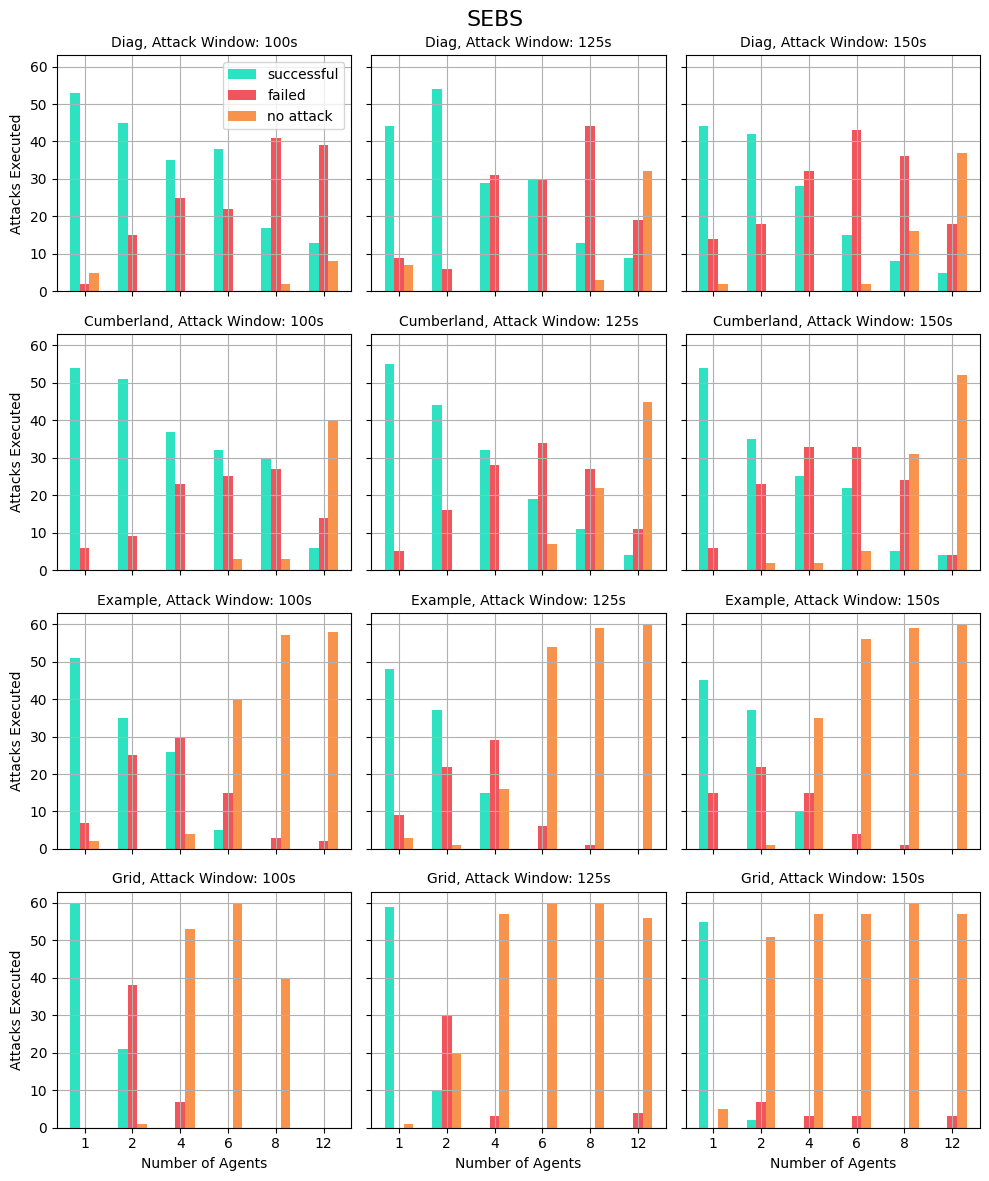

In [53]:
import matplotlib.pyplot as plt
import numpy as np

axis_fontsize = 10
tick_fontsize = 10
legend_fontsize = 10

successful_counts = successful_counts_dict[aw]
total_counts = total_counts_dict[aw]

agents = np.arange(1, 7)
maps = ['Diag', 'Cumberland', 'Example', 'Grid']
names =  ['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents']

colours = ['#DABFFF','#907AD6','#4F518C','#2C2A4A','#7FDEFF']

for j, algo in enumerate(['DTAG', 'DTAP', 'CBLS', 'CBLS_M', 'SEBS']):

    for l in range(2):
    # Create subplots
        fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 12), sharex=True, sharey=True)

        for k, aw in enumerate(aw_values[l*3:l*3+3]):
            successful_counts = successful_counts_dict[aw]

            # Iterate over each subplot and plot the data
            # Iterate over each subplot and plot the data
            for i, map in enumerate(maps):
                col, row = divmod(i, 4)
                ax = axes[row, col+k%3]


                bar_width = 0.2
                gap = 0

                # Calculate positions for the two bars
                positions = agents - 1 * (bar_width + gap)

                color1 = '#2DE1C2'  # Replace with your desired color code
                color2 = '#F2545B'  # Replace with your desired color code
                color3 = '#F7934C'

                ax.bar(positions, successful_counts[j, i, :, 0], width=bar_width, color=color1, label = 'successful')
                ax.bar(positions + bar_width + gap, successful_counts[j, i, :, 1], width=bar_width, color=color2, label = 'failed')
                ax.bar(positions + 2*bar_width + gap, successful_counts[j, i, :, 2], width=bar_width, color=color3, label = 'no attack')


                # ax.plot(agents, AW_agents[j, i, k%3+(l*3), :] / AW_agents_counts[j, i, k%3+(l*3),:], color=colours[j], label=algo, linewidth=5)

                ax.set_title(f'{map}, Attack Window: {aw}s', fontsize=axis_fontsize)
                ax.set_xticks(agents)
                ax.set_xticklabels([1,2,4,6,8,12])
                if (row==0)&(col+k%3==0):
                    ax.legend(fontsize=legend_fontsize)
                # ax.set_yticks(np.arange(0.1, 1.1, 0.1))
                # ax.set_yticklabels(['{:.1f}'.format(x) for x in np.arange(0.1, 1.1, 0.1)])

                ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
                ax.grid()
                
                # fig.suptitle(f'{map}, {names[k]}', fontsize=axis_fontsize)



        axes[0, 0].set_ylabel('Attacks Executed', fontsize=axis_fontsize)
        axes[1, 0].set_ylabel('Attacks Executed', fontsize=axis_fontsize)
        axes[2, 0].set_ylabel('Attacks Executed', fontsize=axis_fontsize)
        axes[3, 0].set_ylabel('Attacks Executed', fontsize=axis_fontsize)

        # Set the x-axis label for the bottom subplots

        axes[3, 0].set_xlabel('Number of Agents', fontsize=axis_fontsize)
        axes[3, 1].set_xlabel('Number of Agents', fontsize=axis_fontsize)
        axes[3, 2].set_xlabel('Number of Agents', fontsize=axis_fontsize)


        fig.suptitle(algo, fontsize=16)

        plt.grid
        plt.tight_layout()  
        if l == 0:
            save_path = os.path.join('plots', f'attack_counts_{algo}_lower.png')
        else:
            save_path = os.path.join('plots', f'attack_counts_{algo}_upper.png')
        plt.savefig(save_path)
        plt.show()
        plt.close(fig)


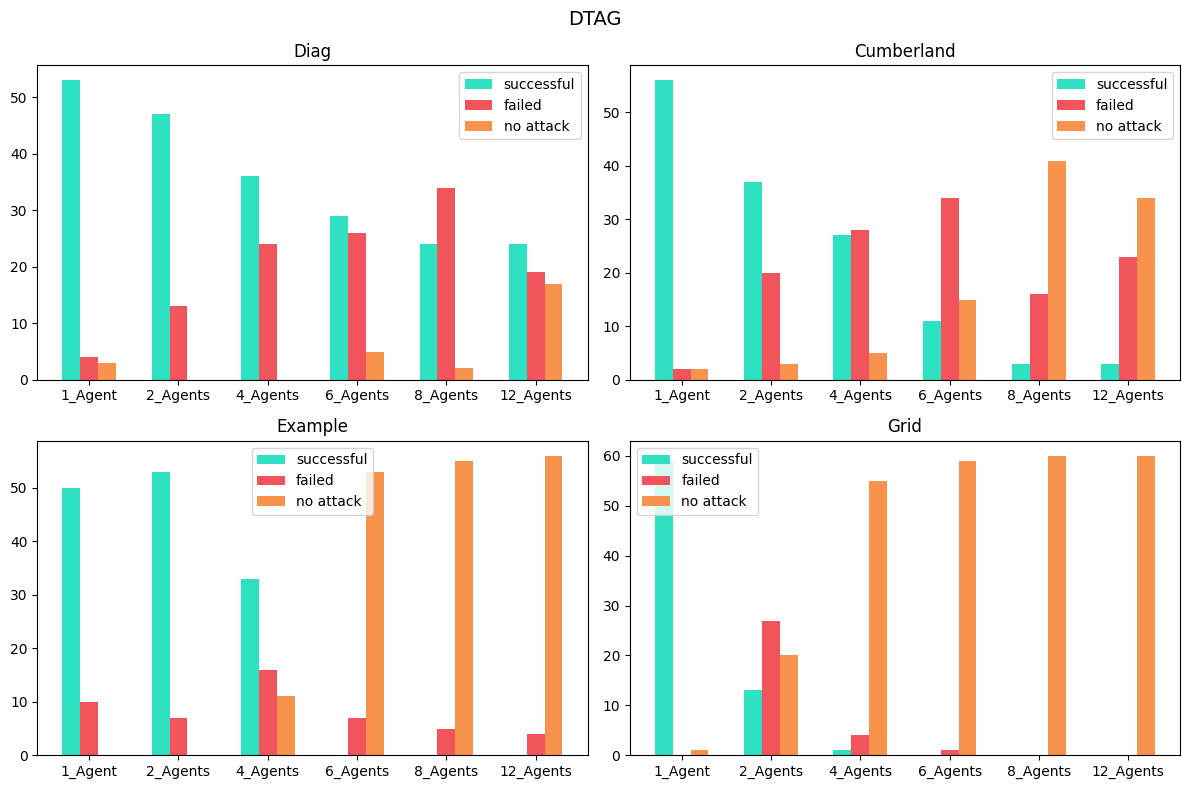

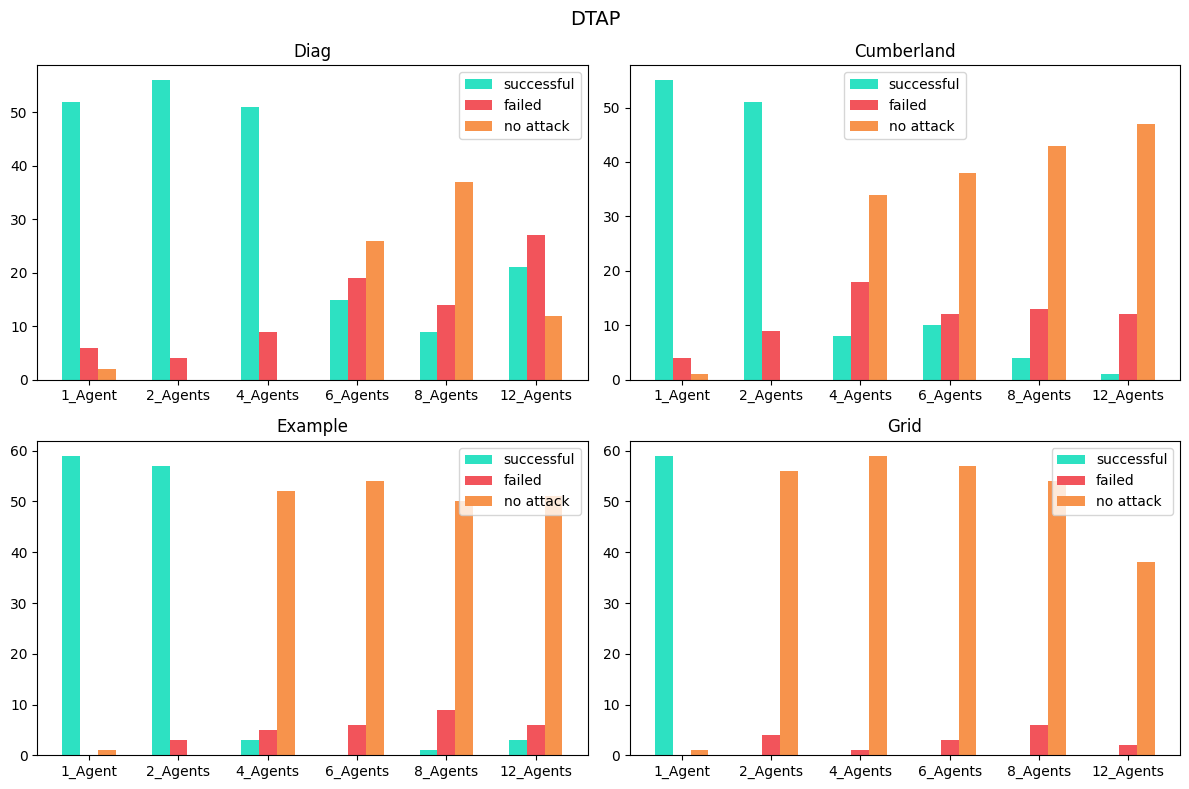

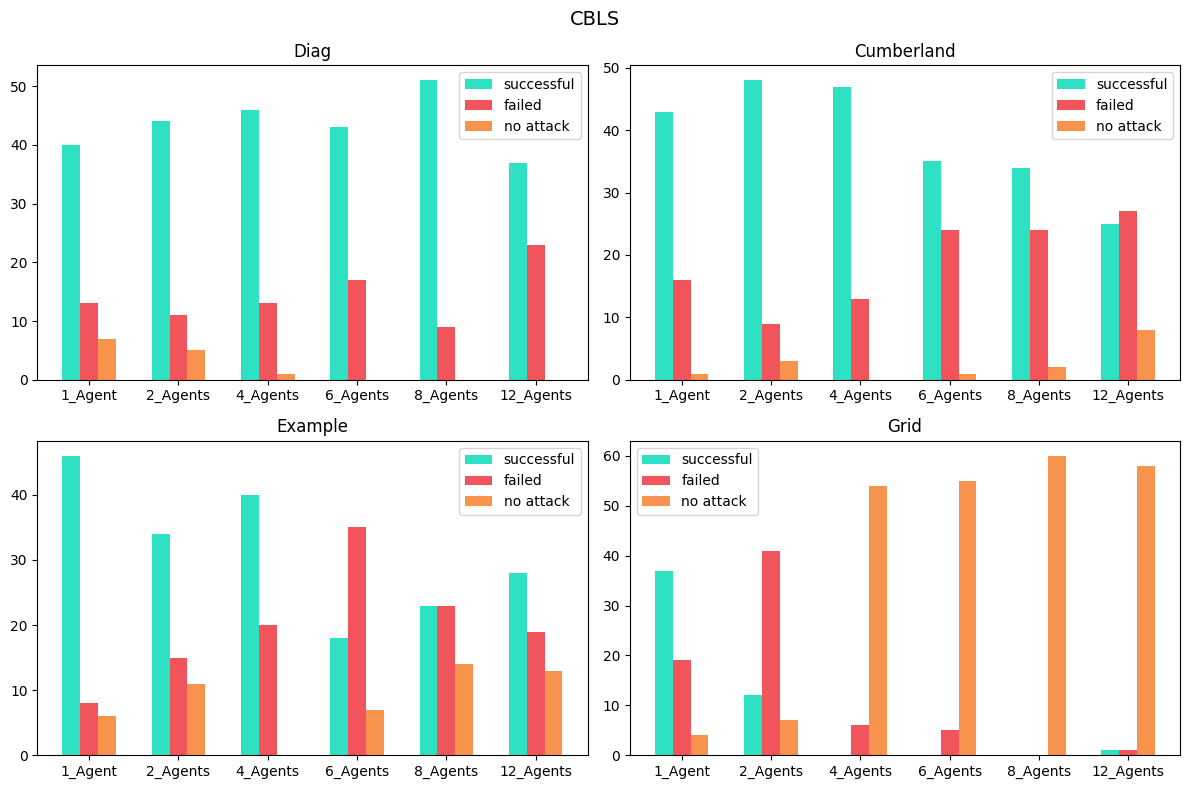

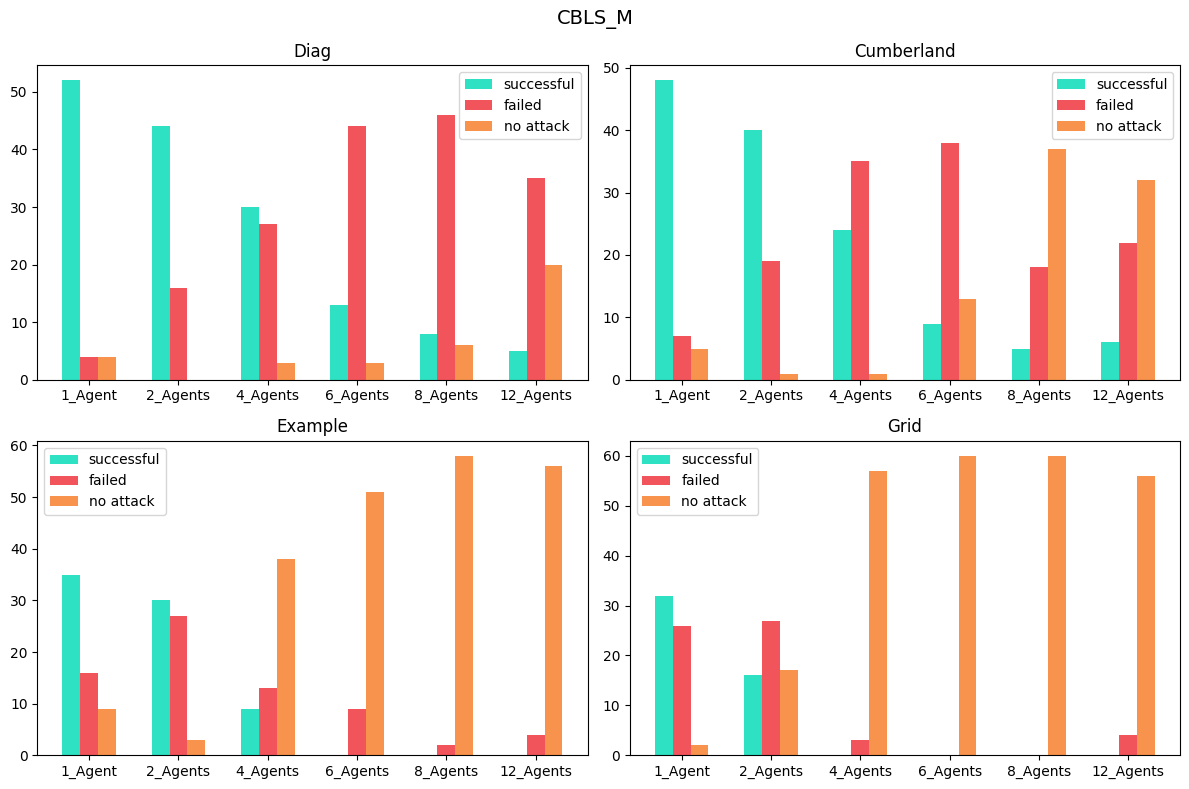

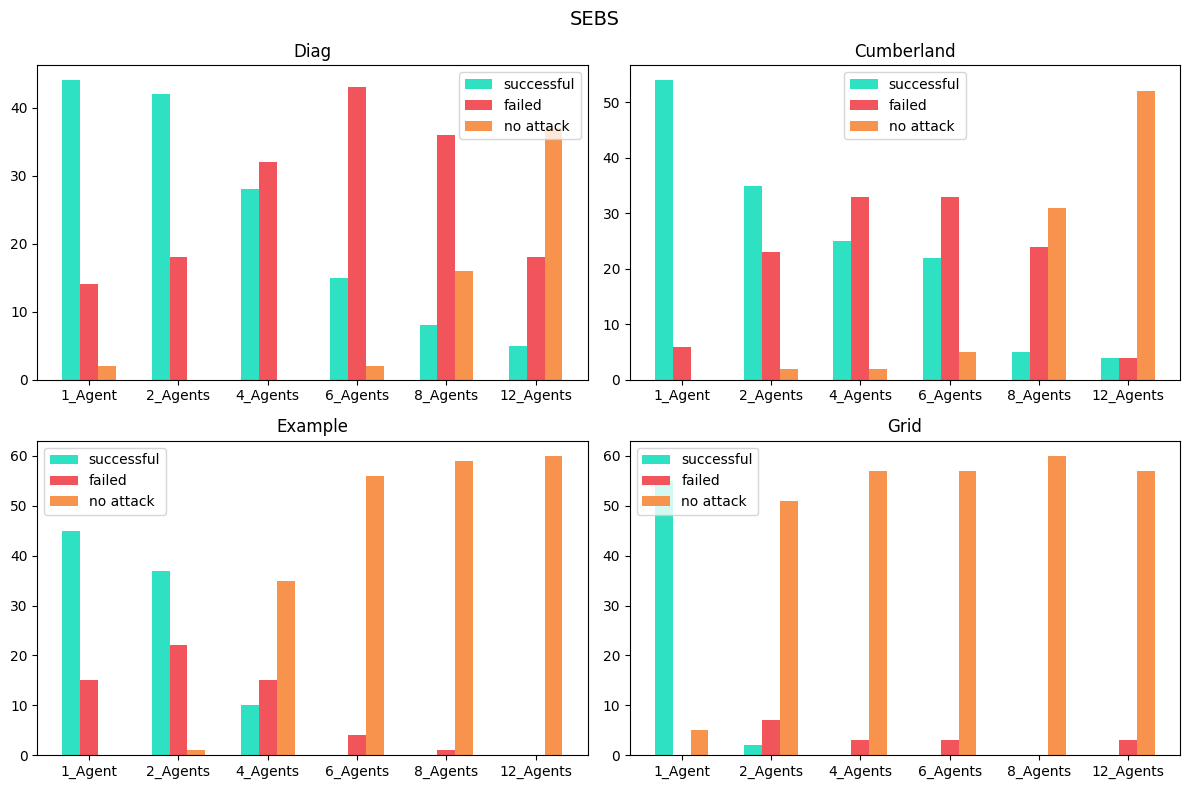

In [54]:
import matplotlib.pyplot as plt
import numpy as np


for j, algo in enumerate(['DTAG','DTAP','CBLS','CBLS_M','SEBS']):
# for j, algo in enumerate(['DTAG']):


    agents = np.arange(1, 7)
    maps = ['Diag', 'Cumberland', 'Example', 'Grid']

    # Create subplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

    # Iterate over each subplot and plot the data
    for i, map in enumerate(maps):
        row, col = divmod(i, 2)
        ax = axes[row, col]

        bar_width = 0.2
        gap = 0

        # Calculate positions for the two bars
        positions = agents - 1 * (bar_width + gap)

        color1 = '#2DE1C2'  # Replace with your desired color code
        color2 = '#F2545B'  # Replace with your desired color code
        color3 = '#F7934C'

        ax.bar(positions, successful_counts[j, i, :, 0], width=bar_width, color=color1, label = 'successful')
        ax.bar(positions + bar_width + gap, successful_counts[j, i, :, 1], width=bar_width, color=color2, label = 'failed')
        ax.bar(positions + 2*bar_width + gap, successful_counts[j, i, :, 2], width=bar_width, color=color3, label = 'no attack')

        # ax.plot(positions, successful_counts[j, i, :, 0], marker='o', color=color1, label='successful')
        # ax.plot(positions + bar_width + gap, successful_counts[j, i, :, 1], marker='o', color=color2, label='failed')
        # ax.plot(positions + 2*bar_width + gap, successful_counts[j, i, :, 2], marker='o', color=color3, label='no attack')

        # Plot bars for each month
        # ax.bar(agents, successful_counts[j,i,:], color='skyblue')
        
        ax.set_title(map)
        ax.set_xticks(agents)
        ax.set_xticklabels(['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents'])
        ax.legend()

    # Adjust layout and show the plot

    fig.suptitle(algo, fontsize=14)
    plt.grid
    plt.tight_layout()
    plt.show()


In [55]:
# average_times = np.zeros((5,4,6))


# for algo in range(5):
#     for j, data in enumerate(dataset[algo,0,:,:]):
#         for i in range(len(data)):
#             if str(data[i]) != 'nan':
#                 average_times[algo,j//18,j%18//3] += (data[i]/(dataset.shape[1]*dataset.shape[-1]))
#             else:
#                 average_times[algo,j//18,j%18//3] += (2000/(dataset.shape[1]*dataset.shape[-1]))

# average_times[2][1]

In [56]:
# import matplotlib.pyplot as plt
# import numpy as np


# for j, algo in enumerate(['DTAG','DTAP','CBLS','CBLS_M','SEBS']):
# # for j, algo in enumerate(['DTAG']):


#     agents = np.arange(1, 7)
#     maps = ['Diag', 'Cumberland', 'Example', 'Grid']

#     # Create subplots
#     fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

#     # Iterate over each subplot and plot the data
#     for i, map in enumerate(maps):
#         row, col = divmod(i, 2)
#         ax = axes[row, col]

#         bar_width = 0.2
#         gap = 0

#         # Calculate positions for the two bars
#         positions = agents

#         color1 = '#1D70A2'  # Replace with your desired color code

#         ax.plot(positions, average_times[j, i, :], marker='o', color=color1, label='average time')

#         # Plot bars for each month
#         # ax.bar(agents, successful_counts[j,i,:], color='skyblue')
        
#         ax.set_title(map)
#         ax.set_xticks(agents)
#         ax.set_xticklabels(['1_Agent', '2_Agents', '4_Agents', '6_Agents', '8_Agents', '12_Agents'])
#         ax.legend()

#     # Adjust layout and show the plot

#     fig.suptitle(algo, fontsize=14)
#     plt.grid
#     plt.tight_layout()
#     plt.show()
